# Regresion Lineal

**La Regresión es un modelo que nos permite estimar la relacion que existe entre una variable respuesta (y) y un conjunto de variables explicativas (x1, x2, x3, x4, x5 ...)**


## 1.- Importando paquetes y el conjunto de datos

In [1]:
#Importacion de Librerias
import numpy as np  #Manejo de matrices
import pandas as pd #Manejo de data estructurada (Dataframe)
import matplotlib.pyplot as plt #Graficas
import seaborn as sns #Graficas mas sencillas
%matplotlib inline

In [2]:
#Importacion de los Datos
df = pd.read_csv("https://raw.githubusercontent.com/aurea-soriano/ML-Datasets/master/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2.- Exploracion de los Datos

**El método 'info()'los tipos y números de datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### 2.1.- Exploracion Grafica

**Distribución del precio (la cantidad prevista)**

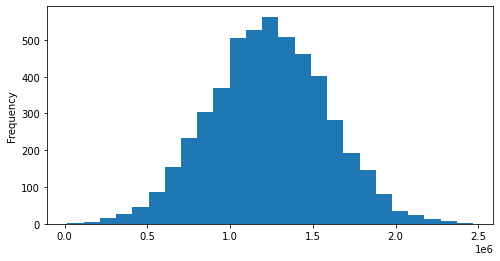

In [ ]:
# Histograma
df['Price'].plot.hist(bins=25,figsize=(8,4))
# Densidad
#df['Price'].plot.density()

### 2.2.- Correlaciones

In [ ]:
#Usamos el metodo corr para obtener la matriz de correlaciones
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


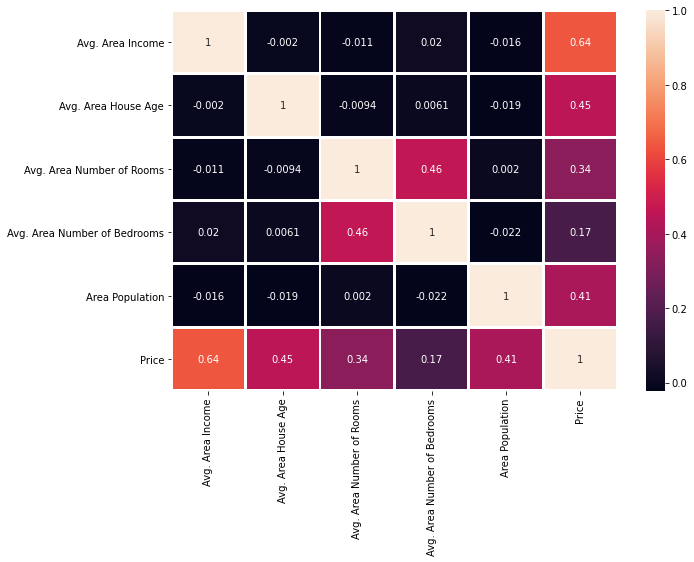

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, linewidths=2)

## 3.- Modelado

**Empezaremos modelando una regresion lineal simple para después pasar a la regresion lineal multiple**

### 3.1.- Regresion Lineal Simple

In [3]:
# Definimos la variable respuesta y la variable predictora
target = 'Price'
predictoras = ['Avg. Area Income']

In [4]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target]

**Separacion en Train y Test**

Nos Ayudamos de la Funcion **train_test_split** de Sklearn

In [ ]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print("Tamaño del conjunto de datos Inicial:", df.shape)
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de datos Inicial: (5000, 7)
Tamaño del conjunto de características del entrenamiento: (3500, 1)
Tamaño del conjunto de características de prueba: (1500, 1)
Tamaño de la variable objetivo del entrenamiento: (3500,)
Tamaño de la variable objetivo de prueba: (1500,)


In [ ]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [ ]:
# Entrenamiento del modelo
lm.fit(X_train, y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [ ]:
print("El término de intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

El término de intersección del modelo lineal: -206897.41836459748
Los coeficientes del modelo lineal: [20.99607335]


In [ ]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

**R cuadrado del ajuste del modelo (que porcentaje de la variacion de y es explicado por x)**

In [ ]:
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.41
Valor del R cuadrado del test: 0.42


Interpretacion: El **42%** de la variación del **precio de las casas de USA** es explicado por el **promedio de los ingresos del área**

In [ ]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 216757.10858454392
MAE del Test: 218757.30221956078

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 72709550004.28122
MAE del Test: 75849278757.84393

Calculando la Raiz del Error Cuadratico Medio (RMSE)
MAE del Train: 269647.08417537395
MAE del Test: 275407.4776723463


### 3.2.- Regresion Lineal Multiple

#### 3.2.1.- Regresion Lineal Multiple por Gradiente del Descenso (Sklearn)

In [ ]:
# Definimos la variable respuesta y la variable predictora
target = 'Price'
predictoras = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target]

In [ ]:
# Generamos el conjunto de train y tes gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [ ]:
# Entrenamiento del modelo
lm.fit(X_train, y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [ ]:
print("El término de intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

El término de intersección del modelo lineal: -2631028.9017454893
Los coeficientes del modelo lineal: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [ ]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

**R cuadrado del ajuste del modelo (que porcentaje de la variacion de y es explicado por x)**

In [ ]:
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.92
Valor del R cuadrado del test: 0.92


In [ ]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 81257.11762033265
MAE del Test: 81739.77482718186

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 10110916859.639555
MAE del Test: 10489638335.804985

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 100553.05494931298
MAE del Test: 102418.9354358118


### 3.3.- Regresion Polinomica

In [5]:
# Definimos la variable respuesta y la variable predictora
target = 'Price'
predictoras = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']

In [6]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]/1000
y = df[target]/1000

In [7]:
# Generamos el conjunto de train y tes gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
#Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression
#Para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures
#Importamos las metricas de la regresion
from sklearn import metrics

In [9]:
#Creamos una instancia de la regresion_lineal
regresion_lineal = LinearRegression()

#### Grado 2

In [10]:
#Definimos el grado del polinomio
pf = PolynomialFeatures(degree = 2)

In [11]:
#Se transforma las características existentes en características de mayor grado
X_train_poli = pf.fit_transform(X_train)
X_test_poli = pf.fit_transform(X_test)

In [12]:
#Verificamos las dimensiones del nuevo dataframe
X_train_poli.shape

(3500, 21)

In [ ]:
X_train_poli

array([[1.00000000e+00, 7.42799262e+01, 6.92948058e-03, ...,
        2.91600000e-05, 1.45514624e-01, 7.26149028e+02],
       [1.00000000e+00, 5.69578352e+01, 5.96985450e-03, ...,
        4.20250000e-06, 6.04728766e-02, 8.70188888e+02],
       [1.00000000e+00, 7.74534798e+01, 5.90981786e-03, ...,
        9.12040000e-06, 1.60362842e-01, 2.81963960e+03],
       ...,
       [1.00000000e+00, 4.83629820e+01, 6.15165952e-03, ...,
        1.75561000e-05, 2.06793804e-01, 2.43583012e+03],
       [1.00000000e+00, 7.20293129e+01, 7.07214566e-03, ...,
        1.16281000e-05, 1.43708526e-01, 1.77605460e+03],
       [1.00000000e+00, 7.17780262e+01, 5.92127971e-03, ...,
        1.60000000e-05, 1.50536165e-01, 1.41632107e+03]])

In [13]:
# Entrenamos el modelo
regresion_lineal.fit(X_train_poli, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("El término de intersección del modelo lineal:", regresion_lineal.intercept_)
print("Los coeficientes del modelo lineal:", regresion_lineal.coef_)

El término de intersección del modelo lineal: -2716.2556587235003
Los coeficientes del modelo lineal: [ 0.00000000e+00  2.12855018e+01  1.67487528e+05  1.38892401e+05
  8.93939911e+03  1.57085448e+01  4.81597102e-03  1.42521500e+02
 -3.05169699e+02  1.80918483e+02  5.96956885e-03 -1.11352065e+05
  5.32145726e+05 -2.30565189e+06 -1.45403046e+02 -1.51114736e+05
 -2.50102972e+05  2.70438437e+01 -3.89327324e+05  2.11782932e+01
 -4.09542379e-03]


In [15]:
# Predecimos la data de entrenamiento y la data del test
train_pred=regresion_lineal.predict(X_train_poli)
test_pred=regresion_lineal.predict(X_test_poli)

In [16]:
#Hallamos el R2
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.92
Valor del R cuadrado del test: 0.92


In [17]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 81.10614052574357
MAE del Test: 81.64571014819035

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 10087.408760605587
MAE del Test: 10513.559420753765

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 100.43609291786288
MAE del Test: 102.5356495115419


#### Grado 3

In [18]:
#Definimos el grado del polinomio
pf = PolynomialFeatures(degree = 3)

In [19]:
#Se transforma las características existentes en características de mayor grado
X_train_poli = pf.fit_transform(X_train)
X_test_poli = pf.fit_transform(X_test)

In [20]:
#Verificamos las dimensiones del nuevo dataframe
X_train_poli.shape

(3500, 56)

In [21]:
# Entrenamos el modelo
regresion_lineal.fit(X_train_poli, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print("El término de intersección del modelo lineal:", regresion_lineal.intercept_)
print("Los coeficientes del modelo lineal:", regresion_lineal.coef_)

El término de intersección del modelo lineal: -166662.56783744154
Los coeficientes del modelo lineal: [ 1.65570329e+05  9.25088465e+00 -3.13909526e+05  3.81876926e+04
 -9.23167262e+04  1.32594445e+01  9.89094322e-02  1.73411918e+03
  9.94231109e+02  2.61393816e+02 -2.07415009e-01  3.72974591e+07
  4.80552186e+07  8.45314401e+06  9.44378159e+02 -7.95619898e+06
 -1.33993279e+07 -6.37439566e+02  1.54502728e+07  2.83581381e+03
  7.04745737e-02 -1.73709239e-04 -2.86357382e+00 -1.21966561e+01
 -7.47858626e+00  1.98401797e-03 -5.52890016e+04 -1.87348810e+05
  1.36555167e+05  6.24310294e+00  1.34544349e+05 -5.66346101e+04
 -3.00414993e+00  6.04748493e+04  2.95900196e-01 -1.02097169e-03
 -1.40232560e+09 -7.98588812e+08 -6.80310025e+08  4.95987494e+03
 -2.24363822e+09  1.83410747e+09 -1.45054229e+04 -2.21306724e+09
 -1.84421654e+05 -9.70843554e+00  5.14744268e+08  4.98090768e+08
 -5.59489889e+03 -7.03100465e+08  1.32299388e+05  6.59785981e+00
  2.59864149e+08 -1.40917021e+05 -2.02234888e+01  7.8

In [23]:
# Predecimos la data de entrenamiento y la data del test
train_pred=regresion_lineal.predict(X_train_poli)
test_pred=regresion_lineal.predict(X_test_poli)

In [24]:
#Hallamos el R2
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.92
Valor del R cuadrado del test: 0.92


In [25]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 80.92503300537001
MAE del Test: 81.7377274671443

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 10001.910589883217
MAE del Test: 10519.78088429125

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 100.00955249316546
MAE del Test: 102.56598307573154


#### Evaluando con mayor grado

In [26]:
#Definimos el grado del polinomio
R2Train = []
R2Test = []
for grado in range(4,11):
  print("*"*40 + " Evaluando Polinomio de grado " + str(grado) + "*"*40)
  pf = PolynomialFeatures(degree = grado)
  #Se transforma las características existentes en características de mayor grado
  X_train_poli = pf.fit_transform(X_train)
  X_test_poli = pf.fit_transform(X_test)
  # Entrenamos el modelo
  regresion_lineal.fit(X_train_poli, y_train)
  # Predecimos la data de entrenamiento y la data del test
  train_pred=regresion_lineal.predict(X_train_poli)
  test_pred=regresion_lineal.predict(X_test_poli)
  #Calculamos los indicadores
  R2Train.append(round(metrics.r2_score(y_train,train_pred), 2))
  R2Test.append(round(metrics.r2_score(y_test,test_pred), 2))
  print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
  print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))
  print("Calculando el Error Absoluto Medio (MAE)")
  print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
  print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
  print("\nCalculando el Error Cuadratico Medio (MSE)")
  print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
  print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
  print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
  print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
  print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

**************************************** Evaluando Polinomio de grado 4****************************************
Valor del R cuadrado del train: 0.91
Valor del R cuadrado del test: 0.91
Calculando el Error Absoluto Medio (MAE)
MAE del Train: 82.81552892373247
MAE del Test: 84.85787514897032

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 10635.528438319543
MAE del Test: 11524.31683118466

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 103.12869842250285
MAE del Test: 107.35137088637788
**************************************** Evaluando Polinomio de grado 5****************************************
Valor del R cuadrado del train: 0.92
Valor del R cuadrado del test: 0.92
Calculando el Error Absoluto Medio (MAE)
MAE del Train: 80.30883601735191
MAE del Test: 82.87002278991717

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 9905.463228194432
MAE del Test: 10903.545358921267

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 99.526193678

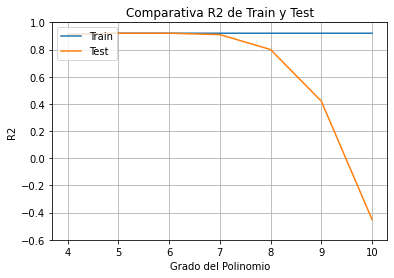

In [27]:
plt.plot(R2Train, label = "Train") # Grafica la primera serie
plt.title("Comparativa R2 de Train y Test")   # Establece el título del gráfico
plt.xlabel("Grado del Polinomio")   # Inserta el título del eje X
plt.ylabel("R2") # Establece el título del eje y
plt.grid(True) # Activa cuadrícula del gráfico
plt.plot(R2Test, label = "Test") # Grafica la segunda serie
plt.legend(loc="upper left") # Activa la Legenda del Gráfico
plt.xticks(list(range(len(R2Train))), list(range(4, 4 + len(R2Train)))) # Etiquetas del eje X
plt.yticks(np.arange(-0.6,1.2,0.2)) # Etiquetas del eje y
plt.show()